In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [73]:
data=pd.read_csv('health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
data.shape

(768, 9)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [82]:
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [85]:
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))
   


Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [89]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [92]:
null_percentage_treated = (data[selected_columns] == 0).mean() * 100
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)
   


Percentage of Null Values for Each Column after the null value treatment:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [94]:
columns=data[selected_columns]


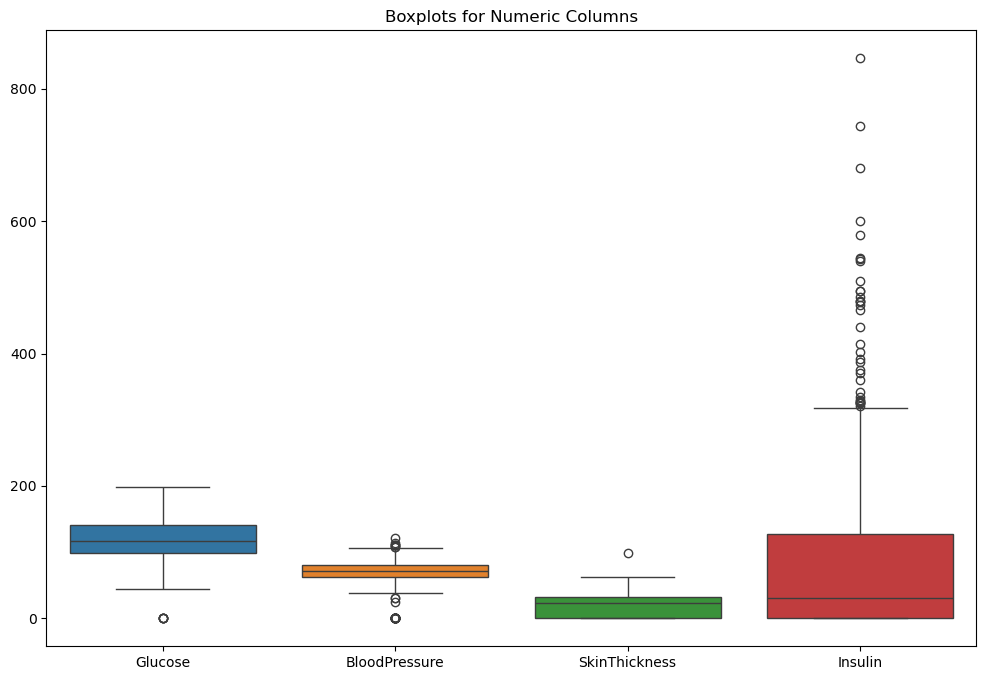

In [97]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [99]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                   6.0000
Glucose                      52.0000
BloodPressure                22.0000
SkinThickness                35.0000
Insulin                     150.0000
BMI                          11.9000
DiabetesPedigreeFunction      0.4676
Age                          19.6000
Outcome                       1.0000
dtype: float64


In [109]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(681, 9)
(768, 9)


In [111]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [113]:
data_cleared_iqr.shape


(681, 9)

In [115]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]



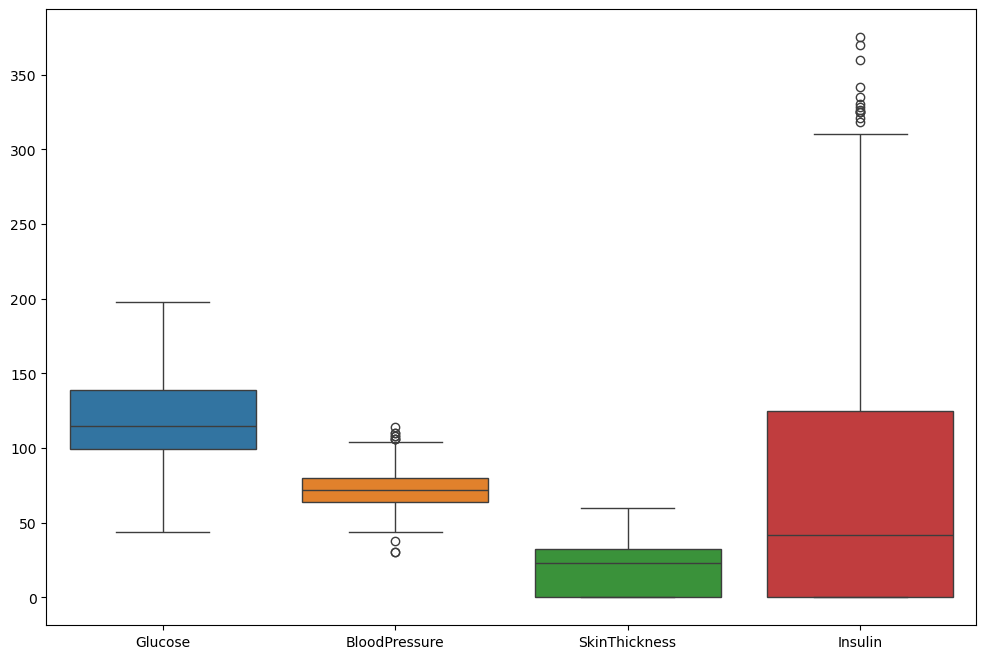

In [117]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

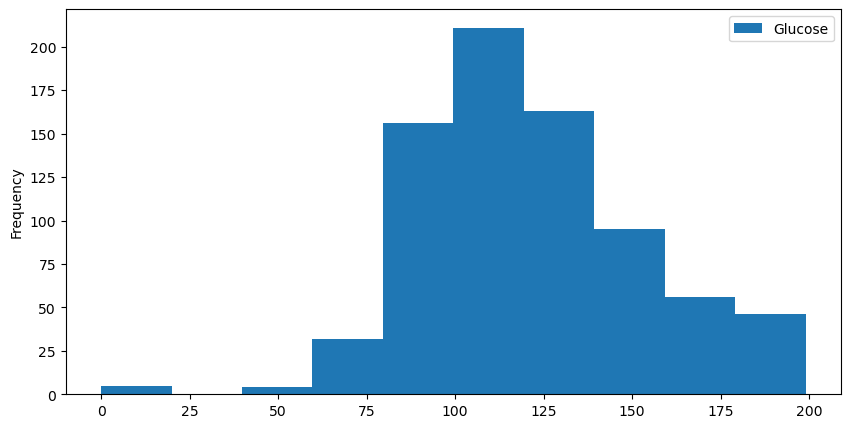

In [119]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()


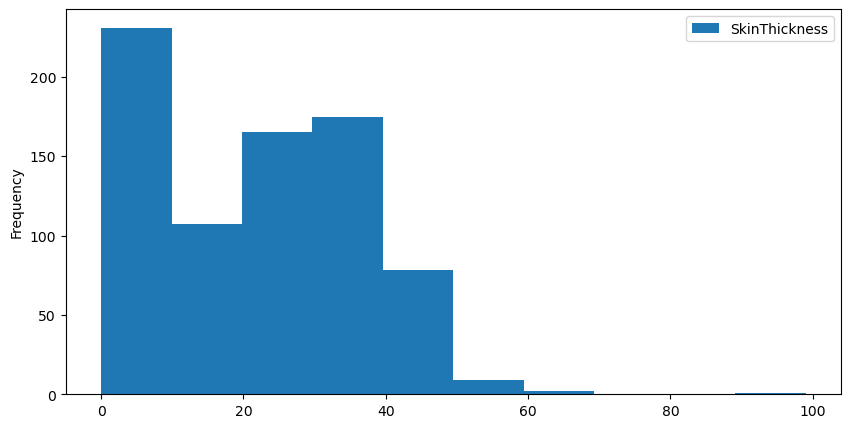

In [121]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5),)
plt.legend()
plt.show()


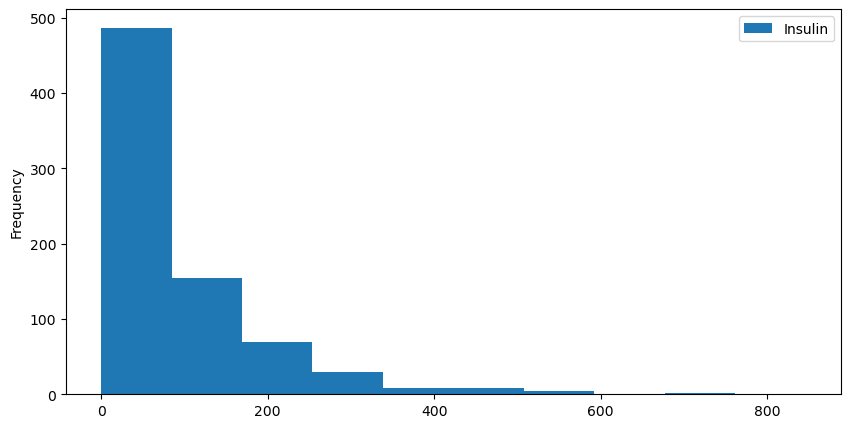

In [123]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

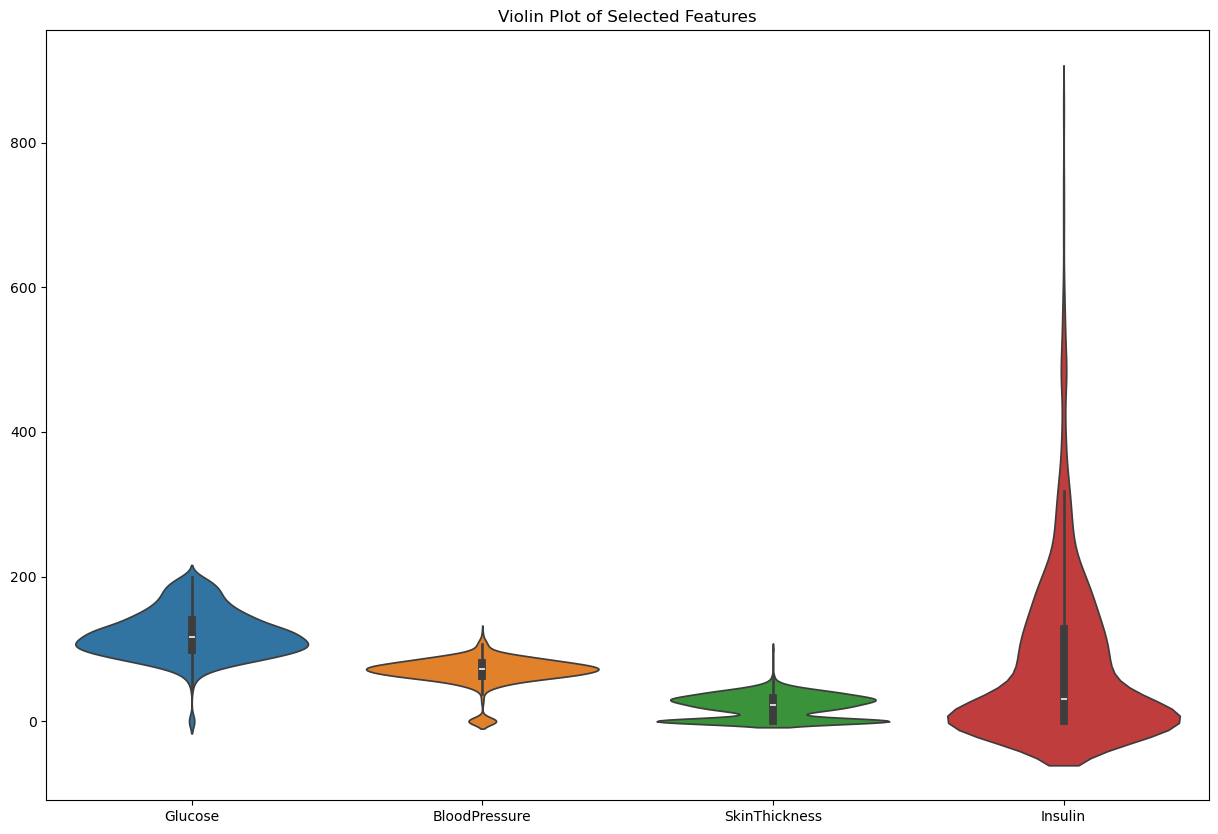

In [129]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()


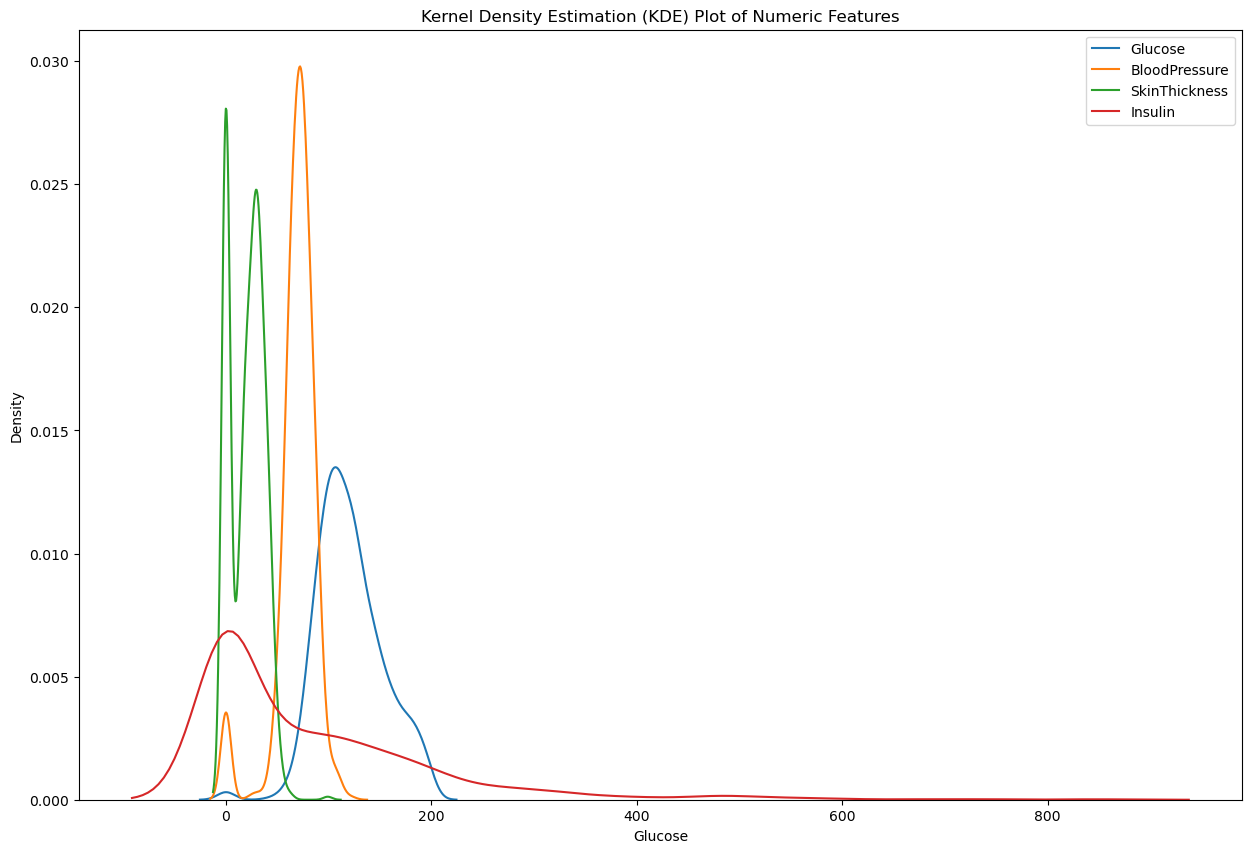

In [141]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
  sns.kdeplot(data[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

          


In [144]:
data.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [148]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

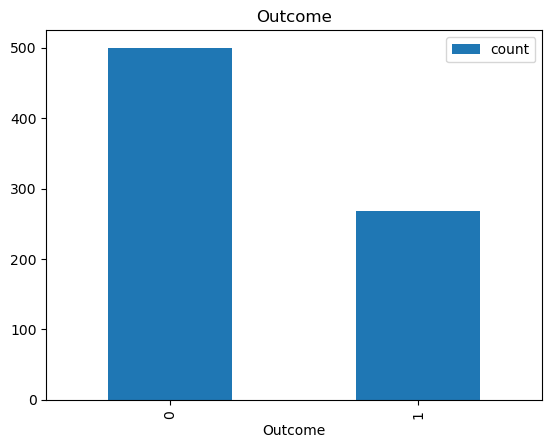

In [150]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()


In [154]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

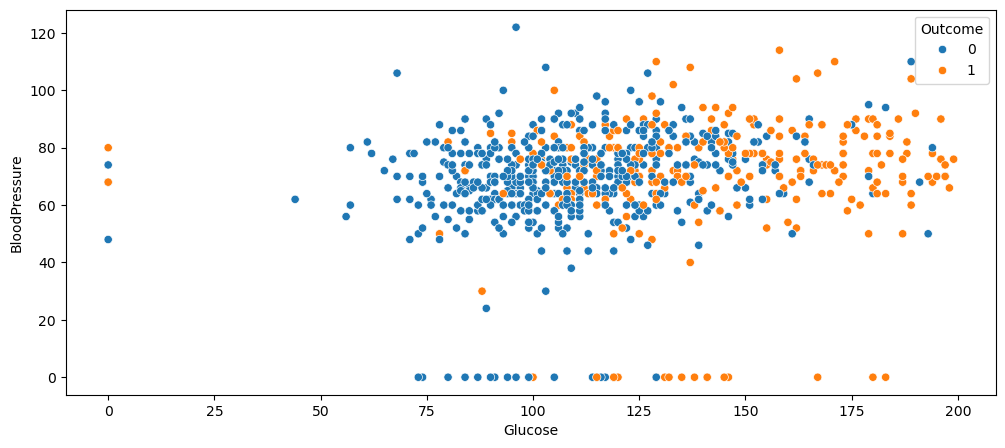

In [156]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

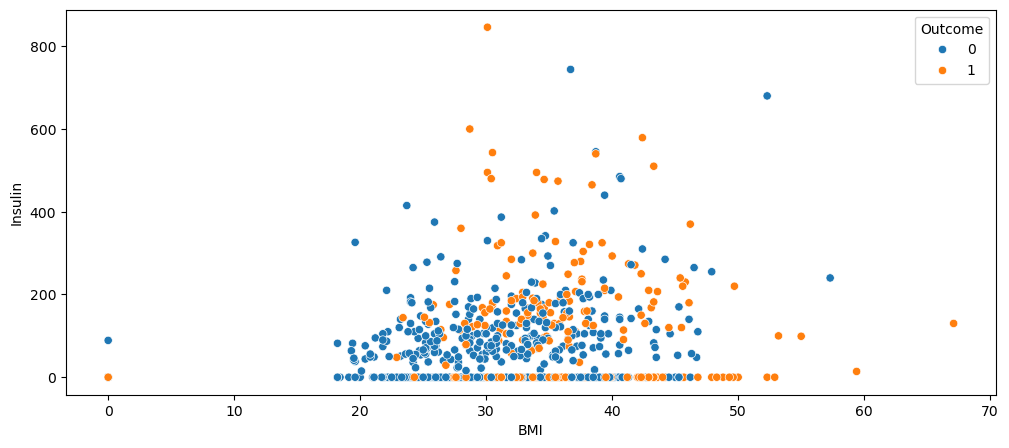

In [160]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()
   


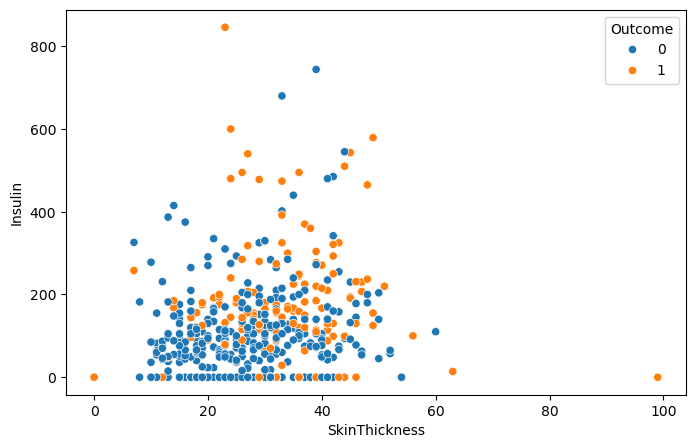

In [162]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()



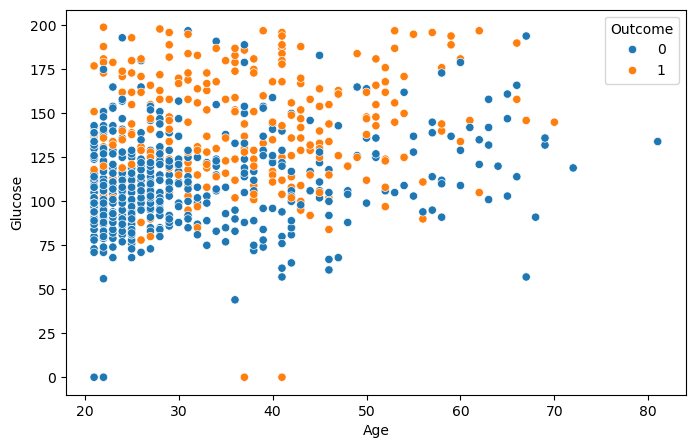

In [166]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()
   


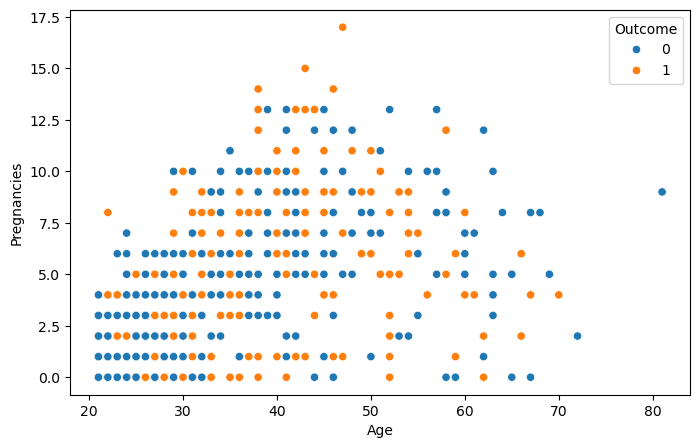

In [168]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

In [170]:
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

<Figure size 640x480 with 0 Axes>

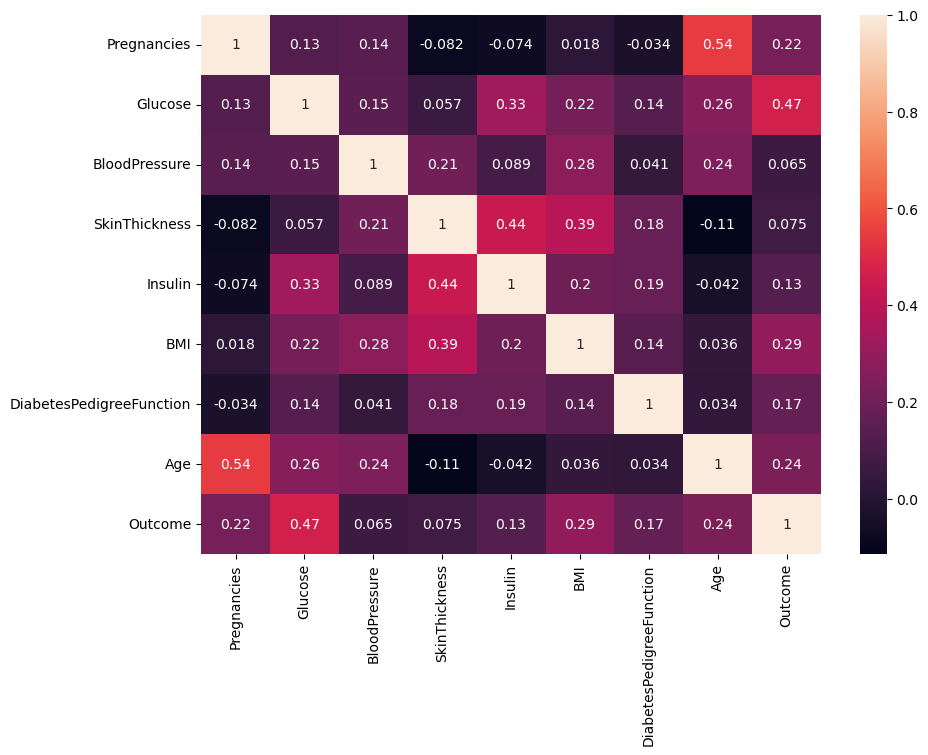

In [174]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()
   
